In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
links_ids_merged = pd.read_csv('datafiles/output/links_ids_merged.csv', sep="|")
not_matched = pd.read_csv('datafiles/output/not_matched.csv', sep="|")
matched = pd.read_csv('datafiles/output/matched.csv', sep="|")

In [3]:
links_ids_merged.loc[:,'match'] = links_ids_merged.certificate_id.notnull()
matches_per_year = pd.DataFrame(index=links_ids_merged.registration_year.unique())


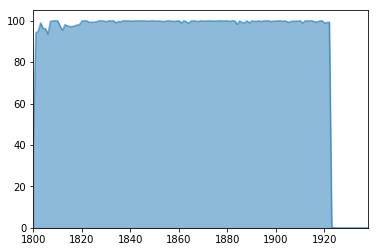

In [8]:
min_year = 1796
max_year = 1938

links_ids_merged = links_ids_merged[(links_ids_merged.registration_year >= min_year) & (links_ids_merged.registration_year <= max_year)]

data_per_year = links_ids_merged[['registration_year', 'match']].groupby(['registration_year'])
years = data_per_year.groups.keys()
success = []
total = []

for year in years:
    data = data_per_year.get_group(year)['match']
    success.append(sum(data))
    total.append(len(data))

plot_data = pd.DataFrame(index=years)
plot_data['total'] = total
plot_data['success'] = success
plot_data['percentage'] = (plot_data['success'] / plot_data['total'].astype(float)) * 100
plot_data.percentage.plot.area(stacked=False)
plt.show()

In [5]:
data_per_year_per_loc = links_ids_merged[['registration_year', 'location_no', 'match']].groupby(['location_no', 'registration_year'])
data_per_year_per_loc.aggregate(['sum', 'count'])

match      
                                 sum count
location_no registration_year             
4.0         1811                 3.0     3
            1812                 3.0     3
            1813                 9.0     9
            1814                 4.0     4
            1815                 6.0     6
            1816                 2.0     2
            1817                 2.0     2
            1818                 2.0     2
            1819                 3.0     3
            1820                 2.0     2
            1821                 6.0     6
            1822                 2.0     2
            1823                 4.0     4
            1824                 6.0     6
            1825                 1.0     1
            1826                 5.0     5
            1827                 3.0     3
            1828                 2.0     2
            1829                 5.0     5
            1830                 4.0     4
            1831                 2.0     2
            1832                 4.0     4
            1833                 1.0     1
            1835                 2.0     2
            1836                 2.0     2
            1837                 2.0     2
            1838                 6.0     6
            1839                 5.0     5
            1841                 5.0     5
            1842                 2.0     2
...                              ...   ...
9890.0      1914               102.0   102
            1915               119.0   119
            1916               127.0   127
            1917               167.0   167
            1918               151.0   151
            1919               162.0   162
            1920               178.0   178
            1921               173.0   173
            1922               168.0   168
            1923                 0.0   154
            1924                 0.0   141
            1925                 0.0   152
            1926                 0.0   143
            1927                 0.0   130
            1928                 0.0   146
            1929                 0.0   163
            1930                 0.0   142
            1931                 0.0   129
            1932                 0.0   132
            1933                 0.0   126
            1934                 0.0   140
            1935                 0.0   137
            1936                 0.0   143
            1937                 0.0   138
10010.0     1800                 0.0     1
            1811                 0.0     3
            1815                 0.0     2
            1830                 0.0     1
            1854                 0.0     1
            1878                 0.0     1

[14429 rows x 2 columns]

In [6]:
years = [x[1] for x in data_per_year_per_loc.groups.keys()]
locations = [x[0] for x in data_per_year_per_loc.groups.keys()]

len(years), len(locations)

(14429, 14429)

In [7]:
plot_data

,total,success,percentage
1800,536,233,43.470149
1801,310,292,94.193548
1802,299,284,94.983278
1803,308,305,99.025974
1804,351,338,96.296296
1805,313,301,96.166134
1806,324,303,93.518519
1807,329,328,99.696049
1808,347,347,100.000000
1809,325,325,100.000000
